# Validação da Ferramenta - Caso Smith Wing

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import sys
import os
import pickle

from context import src
from src import aerodynamics as aero
from src import aeroelasticity as aelast
from src import control
from src import flight_mechanics as flmec
from src import geometry as geo
from src import loads
from src import structures as struct
from src import visualization as vis

In [103]:
f = open("results\\results.pckl", "rb")
results_case1, results_case2, iteration_results_case2, results_case3, iteration_results_case3 = pickle.load(
    f
)
f.close()

## Alpha = 2º, Airspeed = 25m/s, Altitude = 20000 m

In [104]:
bending_data = np.genfromtxt("data\\smith_wing_fig7_bending.csv", delimiter=";", skip_header=3)
twist_data = np.genfromtxt("data\\smith_wing_fig7_torsion.csv", delimiter=";", skip_header=3)
lift_data = np.genfromtxt("data\\smith_wing_fig7_lift.csv", delimiter=";", skip_header=3)

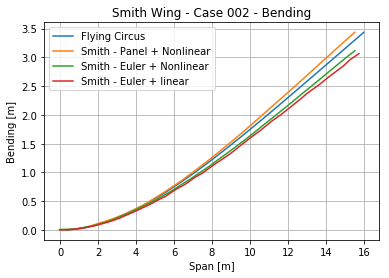

In [105]:
deformation_table = aelast.functions.calculate_deformation_table(
    results_case2["aircraft_original_grids"],
    results_case2["aircraft_struct_deformations"],
)

# sort nodes by desired column, in this case the Y coordinate

nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], nodes[middle:, 2], label="Flying Circus")
ax.plot(bending_data[:, 0], bending_data[:, 1], label="Smith - Panel + Nonlinear")
ax.plot(bending_data[:, 2], bending_data[:, 3], label="Smith - Euler + Nonlinear")
ax.plot(bending_data[:, 4], bending_data[:, 5], label="Smith - Euler + linear")
ax.grid()
ax.set_title("Smith Wing - Case 002 - Bending")
ax.set_ylabel("Bending [m]")
ax.set_xlabel("Span [m]")
ax.legend()
fig.savefig("results\\case002_bending.png", dpi=300)

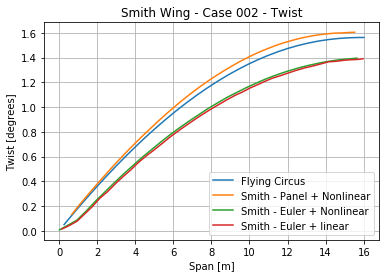

In [106]:
nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], np.degrees(nodes[middle:, 4]), label="Flying Circus")
ax.plot(twist_data[:, 0], twist_data[:, 1], label="Smith - Panel + Nonlinear")
ax.plot(twist_data[:, 2], twist_data[:, 3], label="Smith - Euler + Nonlinear")
ax.plot(twist_data[:, 4], twist_data[:, 5], label="Smith - Euler + linear")
ax.grid()
ax.set_title("Smith Wing - Case 002 - Twist")
ax.set_ylabel("Twist [degrees]")
ax.set_xlabel("Span [m]")
ax.legend()

fig.savefig("results\\case002_twist.png", dpi=300)

In [107]:
components_loads = loads.functions.calc_load_distribution(
    aircraft_force_grid=results_case2["aircraft_force_grid"],
    aircraft_panel_grid=results_case2["original_aircraft_panel_grid"],
    attitude_vector=np.array([2, 0, 0]),
    altitude=20000,
    speed=25,
)
component = components_loads[0]
middle = int(len(component["y_values"]) / 2)

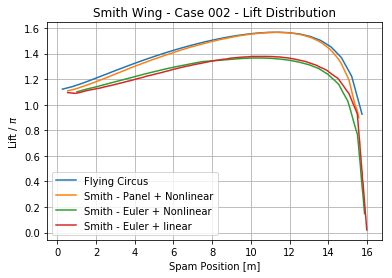

In [108]:
fig, ax = plt.subplots()
ax.set_title("Smith Wing - Case 002 - Lift Distribution")
ax.set_xlabel("Spam Position [m]")
ax.set_ylabel("Lift / $\pi$")
ax.plot(component["y_values"][middle:], component["lift"][middle:] / (np.pi), label="Flying Circus")
ax.plot(lift_data[:, 0], lift_data[:, 1], label="Smith - Panel + Nonlinear")
ax.plot(lift_data[:, 2], lift_data[:, 3], label="Smith - Euler + Nonlinear")
ax.plot(lift_data[:, 4], lift_data[:, 5], label="Smith - Euler + linear")
ax.grid()
ax.legend()

fig.savefig("results\\case002_lift.png", dpi=300)

## Alpha = 4º, Airspeed = 25m/s, Altitude = 20000 m

In [109]:
bending_data = np.genfromtxt("data\\smith_wing_fig8_bending.csv", delimiter=";", skip_header=3)
twist_data = np.genfromtxt("data\\smith_wing_fig8_torsion.csv", delimiter=";", skip_header=3)
lift_data = np.genfromtxt("data\\smith_wing_fig8_lift.csv", delimiter=";", skip_header=3)

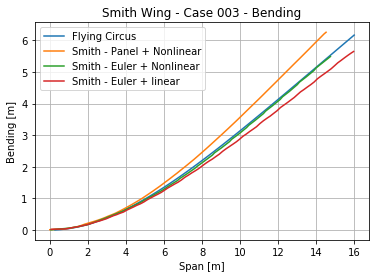

In [110]:
deformation_table = aelast.functions.calculate_deformation_table(
    results_case3["aircraft_original_grids"],
    results_case3["aircraft_struct_deformations"],
)

# sort nodes by desired column, in this case the Y coordinate

nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], nodes[middle:, 2], label="Flying Circus")
ax.plot(bending_data[:, 0], bending_data[:, 1], label="Smith - Panel + Nonlinear")
ax.plot(bending_data[:, 2], bending_data[:, 3], label="Smith - Euler + Nonlinear")
ax.plot(bending_data[:, 4], bending_data[:, 5], label="Smith - Euler + linear")
ax.grid()
ax.set_title("Smith Wing - Case 003 - Bending")
ax.set_ylabel("Bending [m]")
ax.set_xlabel("Span [m]")
ax.legend()
fig.savefig("results\\case003_bending.png", dpi=300)

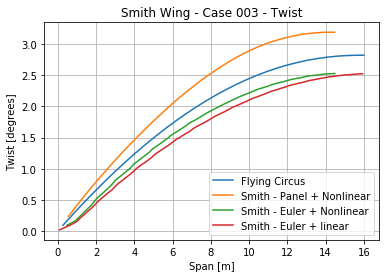

In [111]:
nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], np.degrees(nodes[middle:, 4]), label="Flying Circus")
ax.plot(twist_data[:, 0], twist_data[:, 1], label="Smith - Panel + Nonlinear")
ax.plot(twist_data[:, 2], twist_data[:, 3], label="Smith - Euler + Nonlinear")
ax.plot(twist_data[:, 4], twist_data[:, 5], label="Smith - Euler + linear")
ax.grid()
ax.set_title("Smith Wing - Case 003 - Twist")
ax.set_ylabel("Twist [degrees]")
ax.set_xlabel("Span [m]")
ax.legend()

fig.savefig("results\\case003_twist.png", dpi=300)

In [112]:
components_loads = loads.functions.calc_load_distribution(
    aircraft_force_grid=results_case3["aircraft_force_grid"],
    aircraft_panel_grid=results_case3["original_aircraft_panel_grid"],
    attitude_vector=np.array([4, 0, 0]),
    altitude=20000,
    speed=25,
)
component = components_loads[0]
middle = int(len(component["y_values"]) / 2)

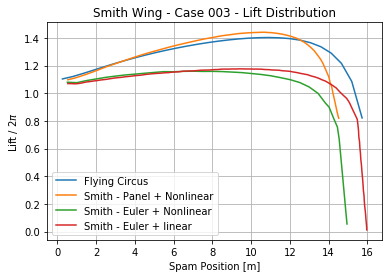

In [113]:
fig, ax = plt.subplots()
ax.set_title("Smith Wing - Case 003 - Lift Distribution")
ax.set_xlabel("Spam Position [m]")
ax.set_ylabel("Lift / $2\pi$")
ax.plot(component["y_values"][middle:], component["lift"][middle:] / (2*np.pi), label="Flying Circus")
ax.plot(lift_data[:, 0], lift_data[:, 1], label="Smith - Panel + Nonlinear")
ax.plot(lift_data[:, 2], lift_data[:, 3], label="Smith - Euler + Nonlinear")
ax.plot(lift_data[:, 4], lift_data[:, 5], label="Smith - Euler + linear")
ax.grid()
ax.legend()

fig.savefig("results\\case003_lift.png", dpi=300)